In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=98aa88421f6146431885ce82d4f887cdc38cb4bcf7999e815f6bfdeb2462867e
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Found 1 faces in the image file /content/Dataset/Rasmiya.jpg


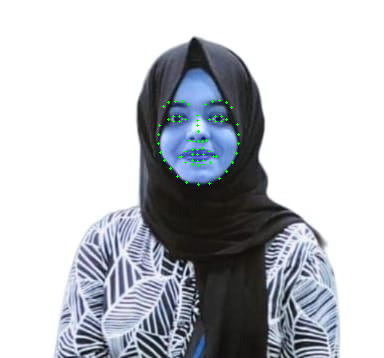

Found 1 faces in the image file /content/Dataset/Aiswarya.jpg


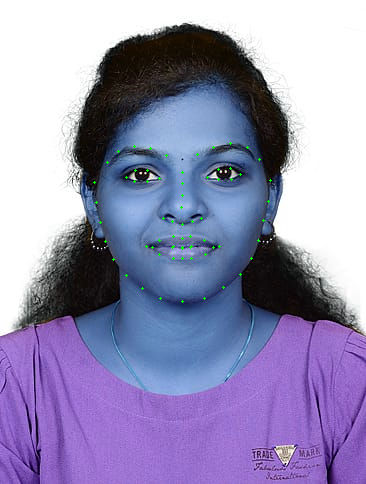

Found 1 faces in the image file /content/Dataset/Rajalekshmi.jpg


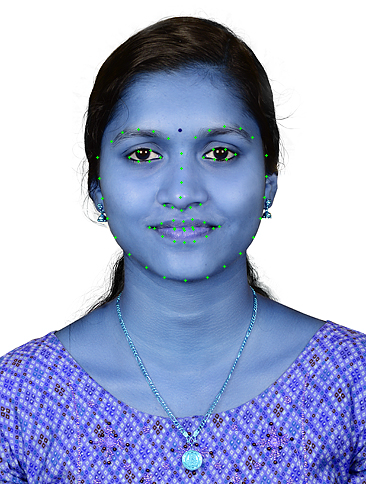

In [ ]:
import os
import dlib
import cv2
from google.colab.patches import cv2_imshow

# Path to the folder containing images
folder_path = '/content/Dataset'

# Path to the shape predictor model
predictor_model = "shape_predictor_68_face_landmarks.dat"

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()
face_pose_predictor = dlib.shape_predictor(predictor_model)

# Function to mark encodings in a single image
def mark_encodings(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run the HOG face detector on the image data
    detected_faces = face_detector(image_rgb, 1)

    print("Found {} faces in the image file {}".format(len(detected_faces), image_path))

    # Loop through each face we found in the image
    for i, face_rect in enumerate(detected_faces):
        # Get the the face's pose
        pose_landmarks = face_pose_predictor(image_rgb, face_rect)

        # Loop through each face landmark
        for i in range(68):
            x = pose_landmarks.part(i).x
            y = pose_landmarks.part(i).y
            cv2.circle(image_rgb, (x, y), 1, (0, 255, 0), -1)

    # Show the marked image
    cv2_imshow(image_rgb)


# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, file_name)
        # Call the function to mark encodings
        mark_encodings(image_path)

I found 1 faces in the file /content/Dataset/Rasmiya.jpg
- Face #0 found at Left: 155 Top: 96 Right: 245 Bottom: 186


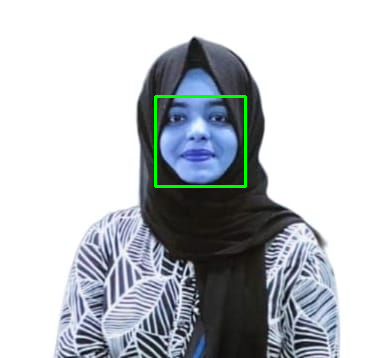

I found 1 faces in the file /content/Dataset/Aiswarya.jpg
- Face #0 found at Left: 97 Top: 118 Right: 283 Bottom: 304


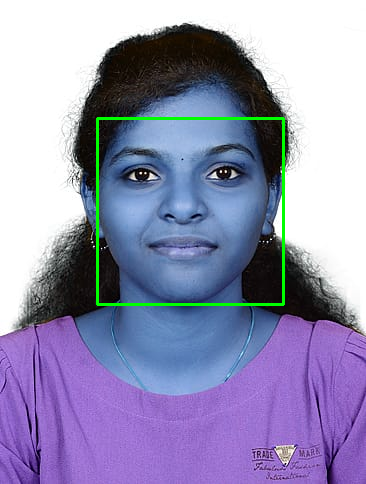

I found 1 faces in the file /content/Dataset/Rajalekshmi.jpg
- Face #0 found at Left: 97 Top: 98 Right: 283 Bottom: 284


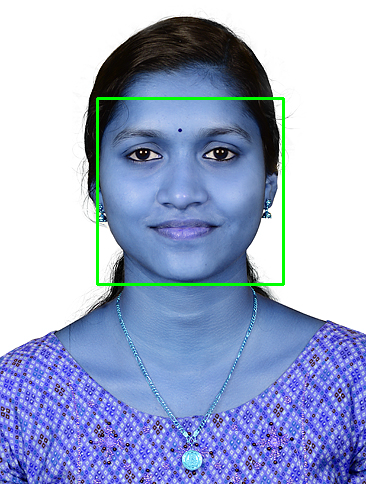

In [ ]:
import os
import dlib
from skimage import io
from google.colab.patches import cv2_imshow

# Path to the folder containing images
folder_path = '/content/Dataset'

# Create a HOG face detector using the built-in dlib class
face_detector = dlib.get_frontal_face_detector()

# Function to process each image in the folder
def process_image(image_path):
    # Load the image into an array
    image = io.imread(image_path)

    # Run the HOG face detector on the image data.
    # The result will be the bounding boxes of the faces in our image.
    detected_faces = face_detector(image, 1)

    print("I found {} faces in the file {}".format(len(detected_faces), image_path))

    # Loop through each face we found in the image
    for i, face_rect in enumerate(detected_faces):
        # Detected faces are returned as an object with the coordinates
        # of the top, left, right and bottom edges
        print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

        # Draw a box around each face we found
        cv2.rectangle(image, (face_rect.left(), face_rect.top()), (face_rect.right(), face_rect.bottom()), (0, 255, 0), 2)

    # Display the image with bounding boxes
    cv2_imshow(image)

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is an image (assuming JPEG format)
    if file_name.lower().endswith(('.jpg', '.jpeg')):
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, file_name)
        # Process the image
        process_image(image_path)

[False] [0.65858536]


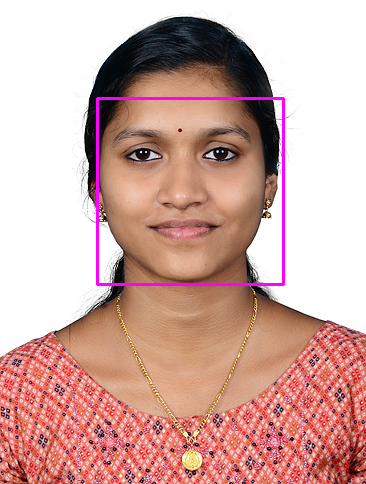

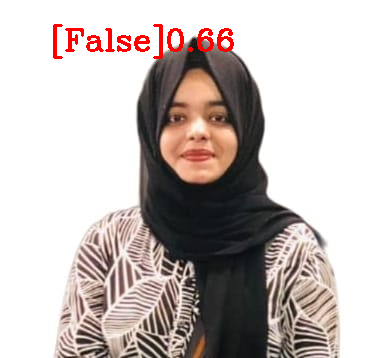

In [ ]:
import cv2
import numpy as np
import face_recognition
from google.colab.patches import cv2_imshow

# Load images from Google Drive
imgReal = face_recognition.load_image_file('/content/Dataset/Rajalekshmi.jpg')
imgTest = face_recognition.load_image_file('/content/Dataset/Rasmiya.jpg')

# Convert images to RGB format
imgReal = cv2.cvtColor(imgReal, cv2.COLOR_BGR2RGB)
imgTest = cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB)

# Locate faces and encode features
faceLoc = face_recognition.face_locations(imgReal)[0]
encodeReal = face_recognition.face_encodings(imgReal)[0]

faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]

# Compare faces
results = face_recognition.compare_faces([encodeReal], encodeTest)
faceDist = face_recognition.face_distance([encodeReal], encodeTest)

print(results, faceDist)

# Draw rectangle and put text
cv2.rectangle(imgReal, (faceLoc[3], faceLoc[0]), (faceLoc[1], faceLoc[2]), (255, 0, 255), 2)
cv2.putText(imgTest, f'{results}{round(faceDist[0], 2)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)

# Display images
cv2_imshow(imgReal)
cv2_imshow(imgTest)

Found 1 faces in the image file /content/Dataset1/2368644390867.jpg
- Face #0 found at Left: 171 Top: 357 Right: 726 Bottom: 911


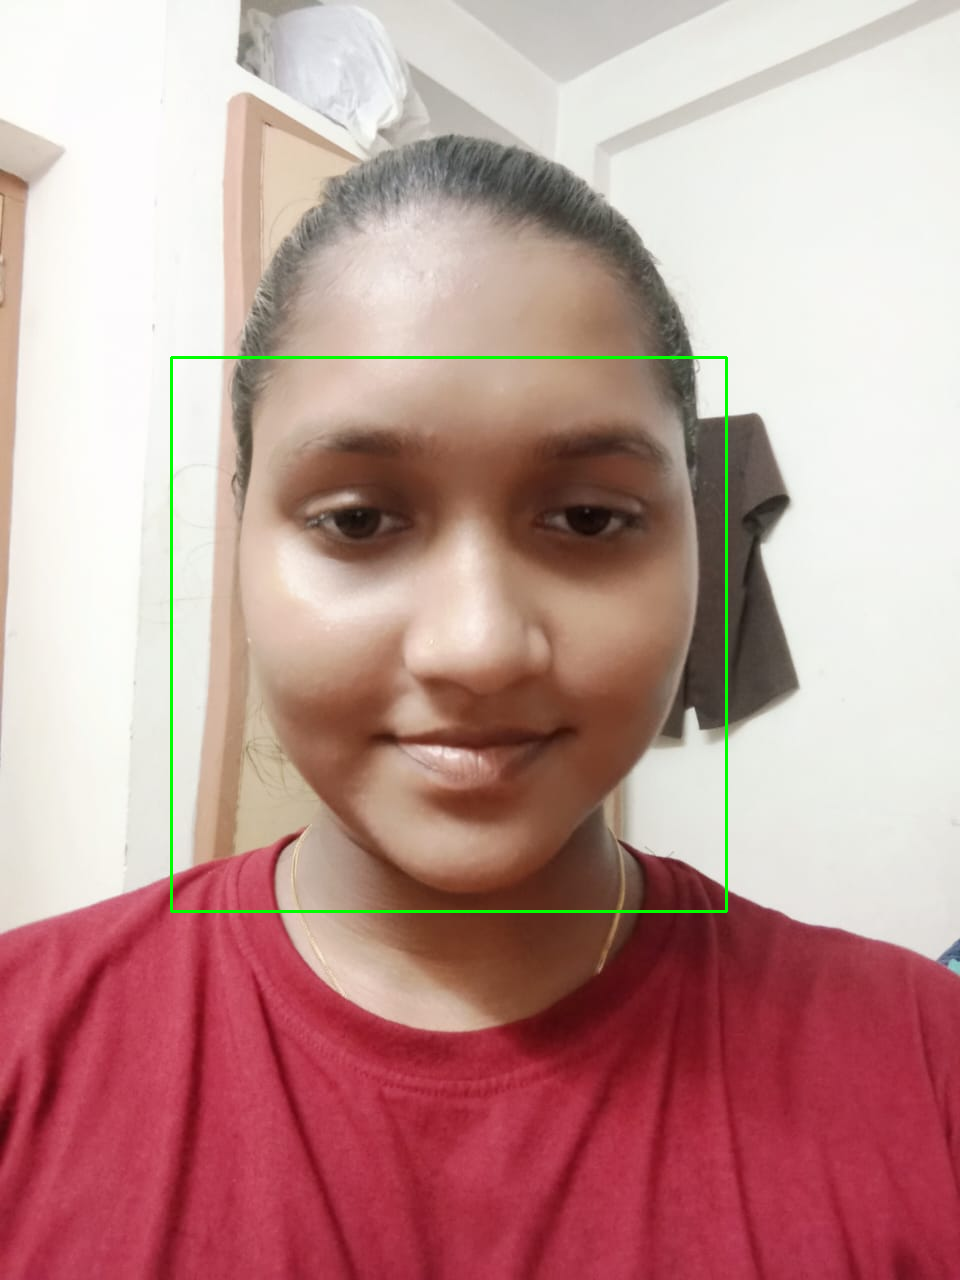

Found 1 faces in the image file /content/Dataset1/4545675453456798.jpg
- Face #0 found at Left: 98 Top: 420 Right: 419 Bottom: 741


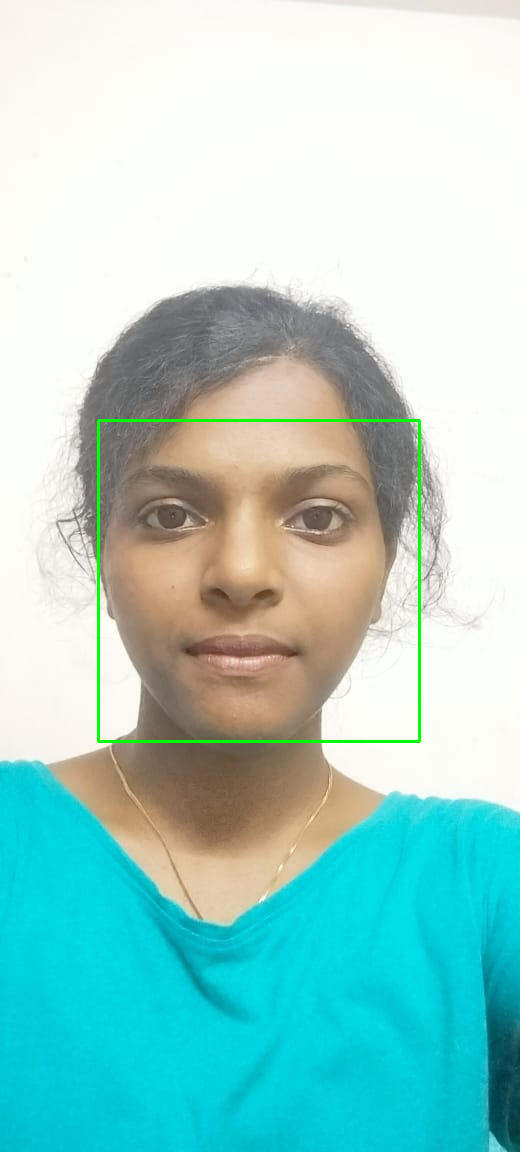

In [ ]:
import dlib
import cv2
from google.colab import files
import os

# Path to the shape predictor model
predictor_model = "/content/shape_predictor_68_face_landmarks.dat"

# Define the directory path where the images are located
dataset_directory = "/content/Dataset1"

# Function to perform face alignment
def align_faces(image_path, predictor_model):
    # Create a HOG face detector using the built-in dlib class
    face_detector = dlib.get_frontal_face_detector()
    face_pose_predictor = dlib.shape_predictor(predictor_model)

    # Load the image
    image = cv2.imread(image_path)

    # Run the HOG face detector on the image data
    detected_faces = face_detector(image, 1)

    print("Found {} faces in the image file {}".format(len(detected_faces), image_path))

    # Loop through each face we found in the image
    for i, face_rect in enumerate(detected_faces):
        # Detected faces are returned as an object with the coordinates
        # of the top, left, right and bottom edges
        print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

        # Get the the face's pose
        pose_landmarks = face_pose_predictor(image, face_rect)

        # Draw a box around each face we found (optional)
        cv2.rectangle(image, (face_rect.left(), face_rect.top()), (face_rect.right(), face_rect.bottom()), (0, 255, 0), 2)

        # Display the aligned face (optional)
        cv2_imshow(image)

# Get the list of image files in the dataset directory
image_file_paths = [os.path.join(dataset_directory, filename) for filename in os.listdir(dataset_directory) if filename.endswith(('.jpg', '.jpeg', '.png'))]

# Process each image file in the dataset
for image_file_path in image_file_paths:
    align_faces(image_file_path, predictor_model)

In [ ]:
import numpy as np
import face_recognition
import os
import cv2
from google.colab import files

# Function to upload images
def upload_images():
    uploaded = files.upload()
    images = []
    classNames = []
    for filename in uploaded.keys():
        img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), -1)
        images.append(img)
        classNames.append(os.path.splitext(filename)[0])
    return images, classNames

# Path to the shape predictor model
path = '/content/Dataset1 '  # Update with your dataset path

# Load images
images, classNames = upload_images()

def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

encodeListKnown = findEncodings(images)
print('Encoding Done')

video_capture = cv2.VideoCapture(0)

while True:
    success,img = video_capture.read()
    imgS = cv2.resize(img,(0,0),None,0.25,0.25)
    imgS = cv2.cvtColor(imgS,cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(imgS)
    encodeCurFrame = face_recognition.face_encodings(imgS, facesCurFrame)

    for encodeFace,faceLoc in zip(encodeCurFrame,facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
        faceDist = face_recognition.face_distance(encodeListKnown,encodeFace)
        accu = str(int(max(faceDist)*100))

        matchIndex = np.argmin(faceDist)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            name_accu = name + ',' + accu + '%'

        y1,x2,y2,x1 = faceLoc
        y1,x2,y2,x1 =  y1*4,x2*4,y2*4,x1*4
        cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),2)
        cv2.rectangle(img,(x1,y2-35),(x2+60,y2),(0,0,0),cv2.FILLED)
        cv2.putText(img,name_accu,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)

    cv2.imshow('Video',img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

Encoding Done
[(96, 182, 225, 53)]


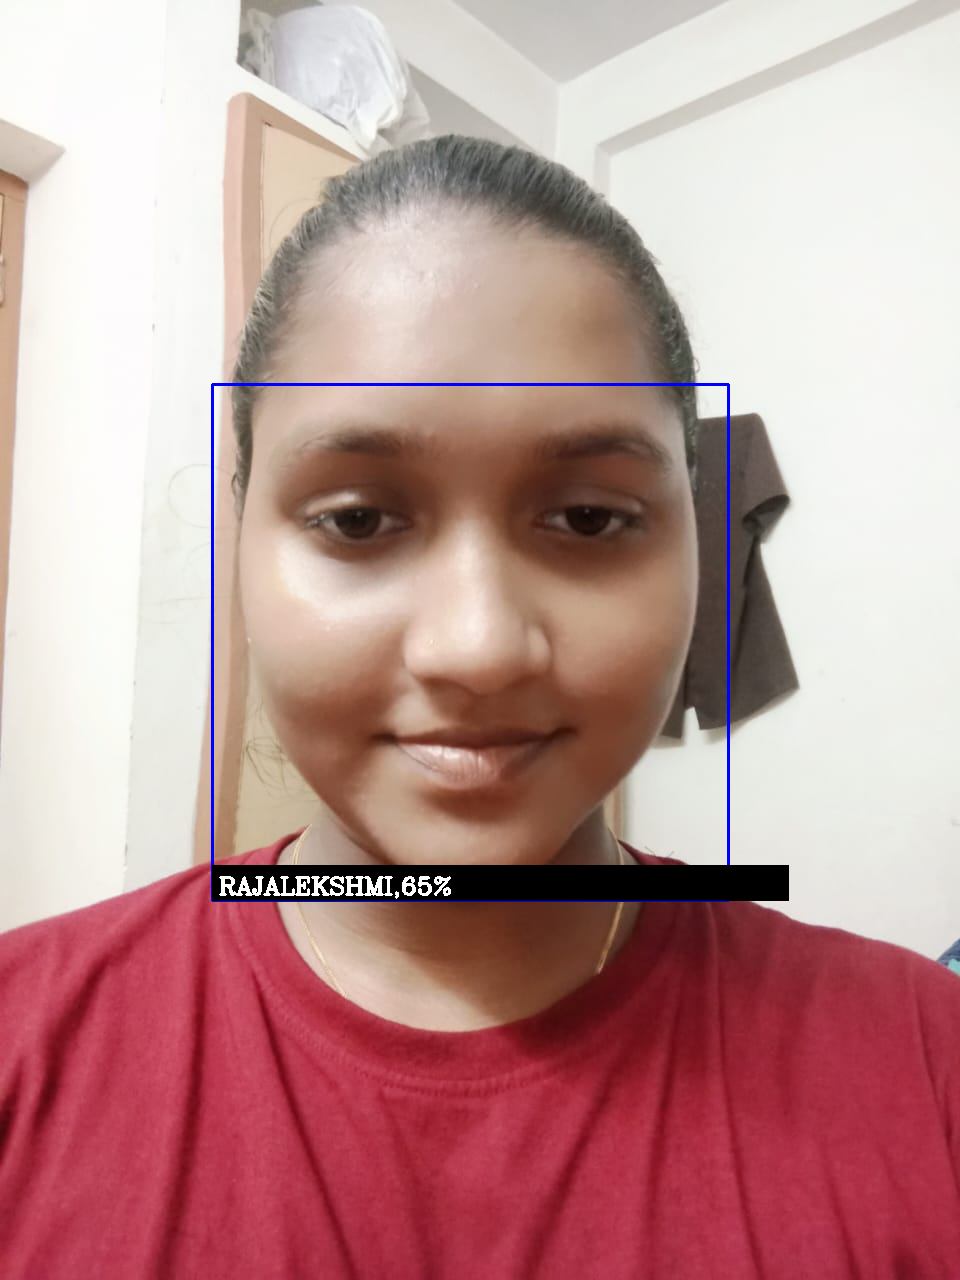

[(105, 96, 179, 21)]


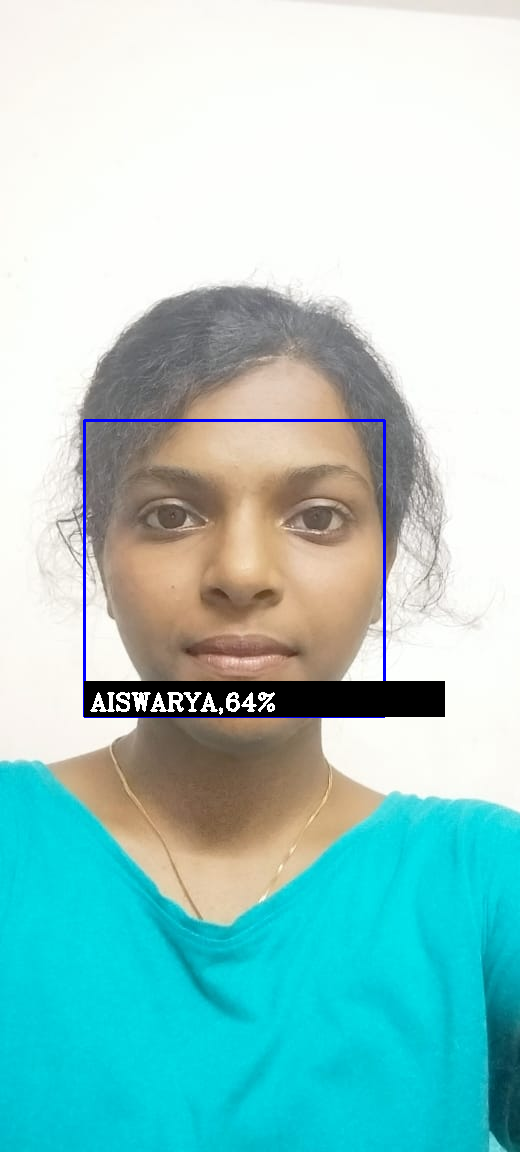

In [ ]:
import numpy as np
import face_recognition
import os
import cv2
from datetime import datetime

from google.colab.patches import cv2_imshow

path = r'Dataset'

images = []
classNames = []
myList = os.listdir(path)
#print(myList)

for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
#print(classNames)

def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

def markAttendance(name):
    with open('Attendance.txt','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name},{dtString}')

encodeListKnown = findEncodings(images)
print('Encoding Done')


for i in os.listdir('Dataset1'):
    #success,img = video_capture.read()
    img = cv2.imread('Dataset1/'+i)
    imgS = cv2.resize(img,(0,0),None,0.25,0.25)
    imgS = cv2.cvtColor(imgS,cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(imgS)
    encodeCurFrame = face_recognition.face_encodings(imgS)
    print(facesCurFrame)

    for encodeFace,faceLoc in zip(encodeCurFrame,facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
        faceDist = face_recognition.face_distance(encodeListKnown,encodeFace)
        #print(faceDist)
        accu = str(int(max(faceDist)*100))

        matchIndex = np.argmin(faceDist)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            name_accu = name + ',' + accu + '%'

        y1,x2,y2,x1 = faceLoc
        y1,x2,y2,x1 =  y1*4,x2*4,y2*4,x1*4
        cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),2)
        cv2.rectangle(img,(x1,y2-35),(x2+60,y2),(0,0,0),cv2.FILLED)
        cv2.putText(img,name_accu,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,0.8,(255,255,255),2)
        markAttendance(name)

    cv2_imshow(img)